In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acronyms-contractions/english_contractions_lowercase.json
/kaggle/input/acronyms-contractions/english_acronyms_lowercase.json
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


### Kaggle competition: Natural Language Processing with Disaster Tweets
Source: Kaggle Competition: NLP Getting Started

The training dataset comprises information on tweets, where each tweet is identified by a unique id. The dataset includes additional fields such as keyword (if provided), location (if available), text, and a binary target variable that indicates whether the tweet refers to a real disaster (1) or not (0).

The test dataset also contains tweets with the same features (id, keyword, location, text), except for the target variable, which is to be predicted.

The dataset features are described as follows:

- id: A unique identifier corresponding to each tweet.
keyword: A significant word extracted from the tweet.
- location: The geographical location from where the tweet was sent.
- text: The actual content of the tweet.
- target: A binary variable indicating the disaster status:
  * 0 if the tweet does not indicate a real disaster.
  * 1 if the tweet does indicate a real disaster.

In [28]:
data_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
data_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
data_train.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


Note that the features keyword and location may be NaN for many tweets.

In [29]:
# The dataset
data_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
data_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

print('The training set contains information on {} tweets.'.format(len(data_train)))
data_train[['id', 'text', 'target']]



The training set contains information on 7613 tweets.


,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [30]:
print('The test set contains information on {} tweets.'.format(len(data_test))); data_test_target = data_test.copy(); data_test_target['target'] = '?'; print(data_test_target[['id', 'text', 'target']])

The test set contains information on 3263 tweets.
         id                                               text target
0         0                 Just happened a terrible car crash      ?
1         2  Heard about #earthquake is different cities, s...      ?
2         3  there is a forest fire at spot pond, geese are...      ?
3         9           Apocalypse lighting. #Spokane #wildfires      ?
4        11      Typhoon Soudelor kills 28 in China and Taiwan      ?
...     ...                                                ...    ...
3258  10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      ?
3259  10865  Storm in RI worse than last hurricane. My city...      ?
3260  10868  Green Line derailment in Chicago http://t.co/U...      ?
3261  10874  MEG issues Hazardous Weather Outlook (HWO) htt...      ?
3262  10875  #CityofCalgary has activated its Municipal Eme...      ?

[3263 rows x 3 columns]


### EDA

In [31]:
data_train_0 = data_train[data_train["target"] == 0]
data_train_1 = data_train[data_train["target"] == 1]

# Class frequencies
print("Number of training tweets not indicating real disasters: {}".format(len(data_train_0)))
print("Number of training tweets indicating real disasters: {}".format(len(data_train_1)))

Number of training tweets not indicating real disasters: 4342
Number of training tweets indicating real disasters: 3271


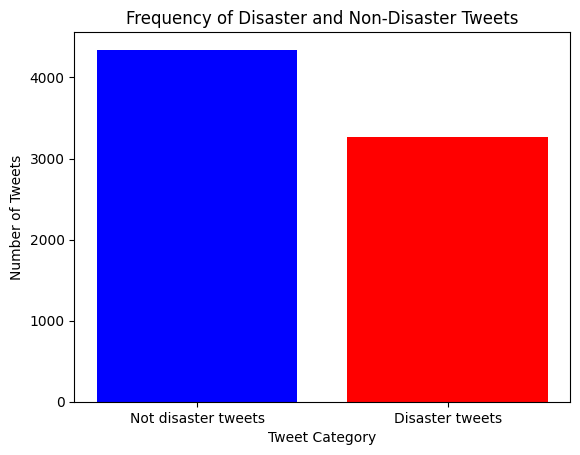

In [32]:
import matplotlib.pyplot as plt

# Data for the histogram
target_frequency = [len(data_train_0), len(data_train_1)]
target_label = ["Not disaster tweets", "Disaster tweets"]
target_color = ["blue", "red"]

# Creating the histogram
plt.bar(target_label, target_frequency, color=target_color)

# Adding title and labels
plt.title("Frequency of Disaster and Non-Disaster Tweets")
plt.xlabel("Tweet Category")
plt.ylabel("Number of Tweets")

# Display the plot
plt.show()

We visualize the proportion of NaN values for the **keyword feature**, as well as the top keywords (both as per total count and count per tweet) for each class.

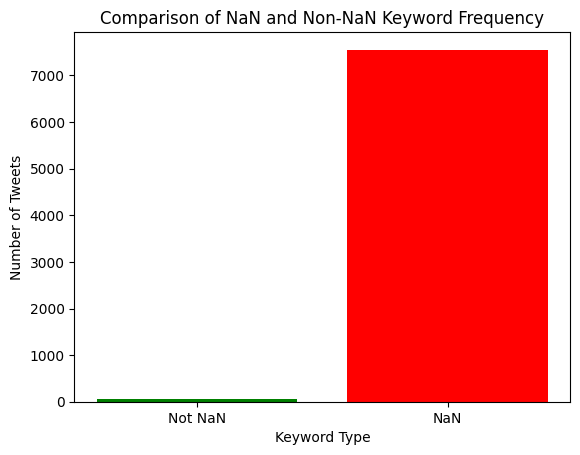

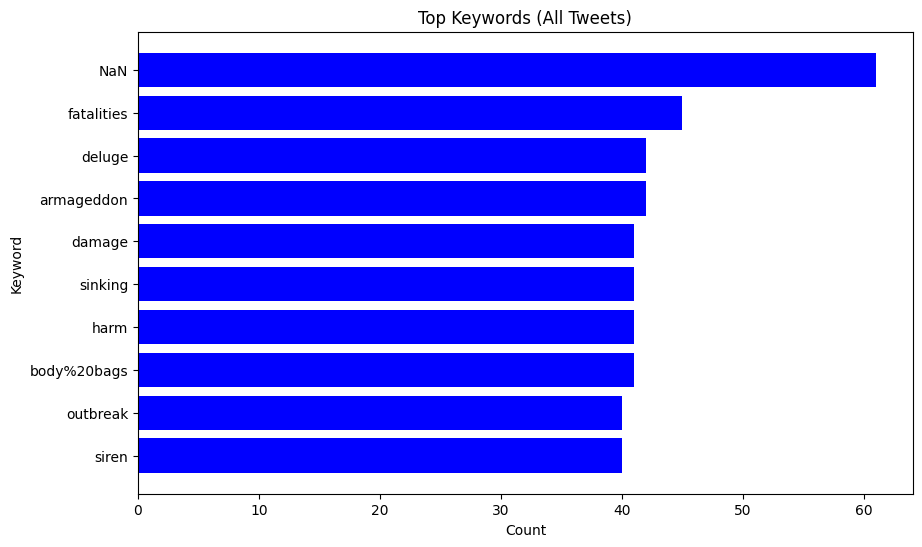

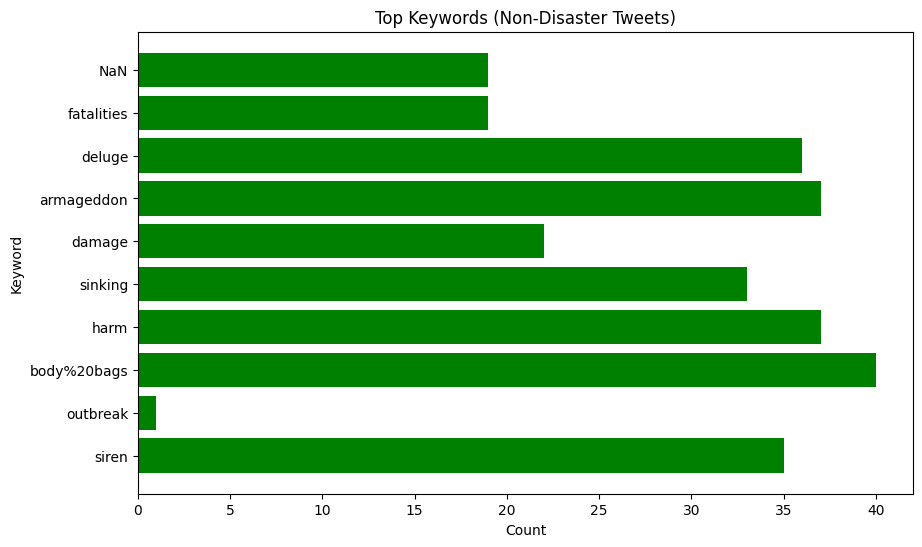

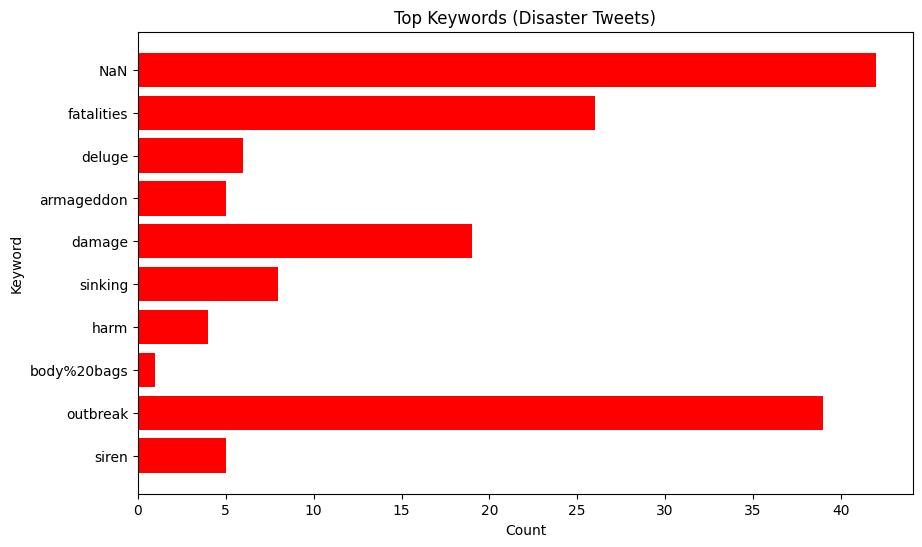

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to count words
def word_counter(word, word_list):
    return word_list.count(word)

# Function to convert 'NaN' types
def nan_type_conv(word_list):
    for i in range(len(word_list)):
        if pd.isna(word_list[i]):
            word_list[i] = 'NaN'

# Load data (assuming the data is already loaded in data_train, data_train_0, data_train_1)
keyword = list(data_train["keyword"])
nan_type_conv(keyword)
keyword_unique = list(set(keyword))
keyword_unique_count = [word_counter(word, keyword) for word in keyword_unique]

keyword_0 = list(data_train_0["keyword"])
nan_type_conv(keyword_0)
keyword_0_unique_count = [word_counter(word, keyword_0) for word in keyword_unique]

keyword_1 = list(data_train_1["keyword"])
nan_type_conv(keyword_1)
keyword_1_unique_count = [word_counter(word, keyword_1) for word in keyword_unique]

# Create the DataFrame
keyword_df = pd.DataFrame()
keyword_df["keyword"] = keyword_unique
keyword_df["count (all tweets)"] = keyword_unique_count
keyword_df["proportion (all tweets)"] = [count/len(keyword) for count in keyword_unique_count]
keyword_df["count (non-disaster tweets)"] = keyword_0_unique_count
keyword_df["proportion (non-disaster tweets)"] = [count/len(keyword_0) for count in keyword_0_unique_count]
keyword_df["count (disaster tweets)"] = keyword_1_unique_count
keyword_df["proportion (disaster tweets)"] = [count/len(keyword_1) for count in keyword_1_unique_count]
keyword_df["absolute difference"] = abs(keyword_df["proportion (disaster tweets)"] - keyword_df["proportion (non-disaster tweets)"])

# Visualization of NaN value proportions
nan_keyword_count = word_counter('NaN', keyword)
keyword_frequency = np.array([nan_keyword_count, len(keyword) - nan_keyword_count])
keyword_label = ["Not NaN", "NaN"]
keyword_color = ["green", "red"]

# Create a histogram for NaN and non-NaN values
plt.bar(keyword_label, keyword_frequency, color=keyword_color)
plt.title("Comparison of NaN and Non-NaN Keyword Frequency")
plt.xlabel("Keyword Type")
plt.ylabel("Number of Tweets")
plt.show()

# Visualization of the top keywords for each class
keyword_df_sorted = keyword_df.sort_values(by="count (all tweets)", ascending=False).head(10)

# All tweets
plt.figure(figsize=(10, 6))
plt.barh(keyword_df_sorted["keyword"], keyword_df_sorted["count (all tweets)"], color='blue', label="All Tweets")
plt.title("Top Keywords (All Tweets)")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.show()

# Non-disaster tweets
plt.figure(figsize=(10, 6))
plt.barh(keyword_df_sorted["keyword"], keyword_df_sorted["count (non-disaster tweets)"], color='green', label="Non-Disaster Tweets")
plt.title("Top Keywords (Non-Disaster Tweets)")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.show()

# Disaster tweets
plt.figure(figsize=(10, 6))
plt.barh(keyword_df_sorted["keyword"], keyword_df_sorted["count (disaster tweets)"], color='red', label="Disaster Tweets")
plt.title("Top Keywords (Disaster Tweets)")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.show()


This script is designed to analyze and visualize keyword usage in different tweet categories (all tweets, disaster-related tweets, non-disaster tweets). It processes the data, counts keyword occurrences, and visualizes the results using bar charts. The visualization helps understand the distribution and importance of keywords in different tweet classes.

The next code generates a horizontal bar chart that compares the frequency of keywords in tweets related to disasters versus non-disaster tweets. In the provided chart, the bars represent the number of times each keyword appears in tweets classified as disaster-related (in blue) and non-disaster-related (in orange). This type of chart is useful for identifying which keywords are more associated with disaster-related tweets and which are not, making it relevant for tasks such as automatic tweet classification or analyzing disaster-related topics on social media.

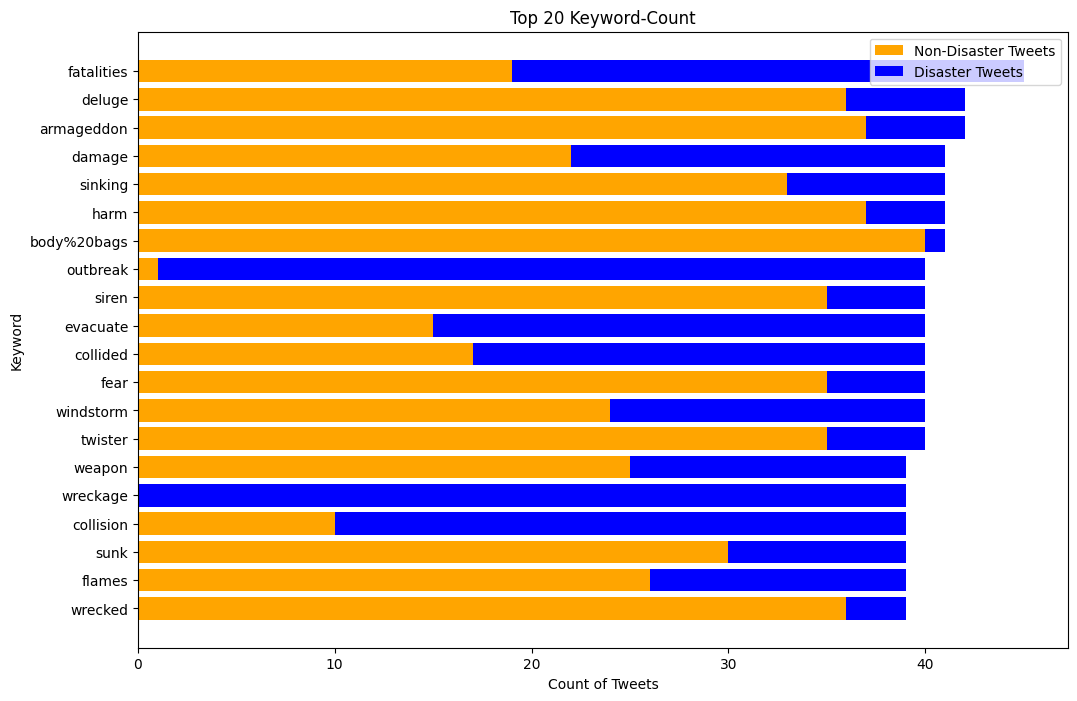

In [34]:
# Function to create a classwise comparison barplot
def classwise_comparison_barplot(df, n, feature, non_disaster, disaster, xlabel, ylabel, title):
    df_top_n = df.head(n)  # Select the top 'n' rows
    plt.figure(figsize=(12, 8))
    
    # Create a horizontal bar plot for non-disaster and disaster tweets
    plt.barh(df_top_n[feature], df_top_n[non_disaster], color='orange', label='Non-Disaster Tweets')
    plt.barh(df_top_n[feature], df_top_n[disaster], color='blue', left=df_top_n[non_disaster], label='Disaster Tweets')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

# Refactored classwise keyword-count
keyword_df_count = (
    keyword_df[["keyword", "count (all tweets)", "count (non-disaster tweets)", "count (disaster tweets)"]]
    .sort_values(by="count (all tweets)", ascending=False)
    .reset_index(drop=True)
)

# Dropping rows where keyword is 'NaN'
keyword_df_count = keyword_df_count[keyword_df_count['keyword'] != 'NaN']

# Call the function with the desired parameters
classwise_comparison_barplot(df=keyword_df_count,
                             n=20,
                             feature="keyword",
                             non_disaster="count (non-disaster tweets)",
                             disaster="count (disaster tweets)",
                             xlabel="Count of Tweets",
                             ylabel="Keyword",
                             title="Top 20 Keyword-Count")


We using the approach of using proportions instead of raw counts, followed by computing the absolute difference between these proportions, is a valid method for assessing how well a keyword discriminates between the two classes. This method allows you to identify keywords that are strong indicators of whether a tweet is disaster-related or not, based on the disparity in their relative frequency across the two classes.

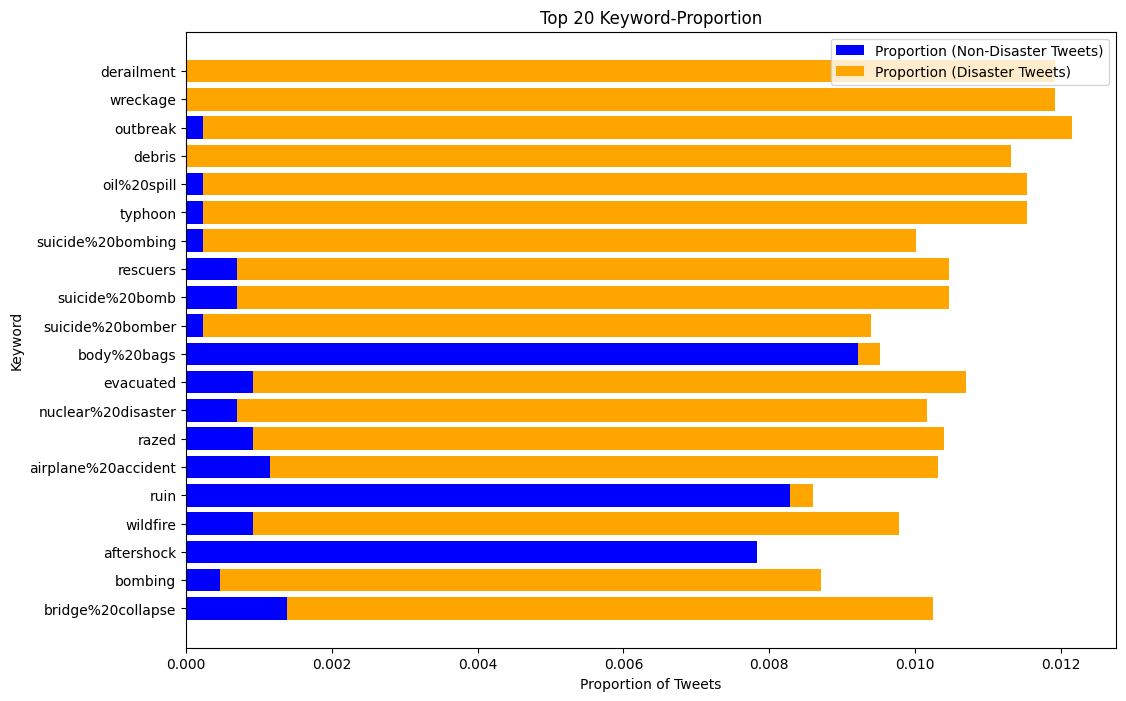

In [35]:
# Function to create a classwise comparison barplot
def classwise_comparison_barplot(df, n, feature, non_disaster, disaster, xlabel, ylabel, title):
    df_top_n = df.head(n)  # Select the top 'n' rows
    plt.figure(figsize=(12, 8))
    
    # Create a horizontal bar plot for non-disaster and disaster tweet proportions
    plt.barh(df_top_n[feature], df_top_n[non_disaster], color='blue', label='Proportion (Non-Disaster Tweets)')
    plt.barh(df_top_n[feature], df_top_n[disaster], color='orange', left=df_top_n[non_disaster], label='Proportion (Disaster Tweets)')
    
    plt.xlabel(ylabel)
    plt.ylabel(xlabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

# Refactored keyword-proportion analysis
keyword_df_proportion = (
    keyword_df[["keyword", "proportion (non-disaster tweets)", "proportion (disaster tweets)", "absolute difference"]]
    .sort_values(by="absolute difference", ascending=False)
    .reset_index(drop=True)
)

# Dropping rows where keyword is 'NaN'
keyword_df_proportion = keyword_df_proportion[keyword_df_proportion['keyword'] != 'NaN']

# Call the function with the desired parameters
classwise_comparison_barplot(df=keyword_df_proportion,
                             n=20,
                             feature="keyword",
                             non_disaster="proportion (non-disaster tweets)",
                             disaster="proportion (disaster tweets)",
                             xlabel="Keyword",
                             ylabel="Proportion of Tweets",
                             title="Top 20 Keyword-Proportion")


In [36]:
# 6 keywords with least absolute difference between proportion in non-disaster tweets and proportion in disaster tweets
keyword_df_proportion["keyword"].tail(6).values.tolist()

['bomb', 'collapse', 'weapons', 'landslide', 'flood', 'disaster']

The result is a list of the 6 keywords with the smallest difference in their proportions between non-disaster and disaster tweets, which suggests that these keywords are evenly distributed across both classes and are not particularly discriminative. 
These keywords have proportions in disaster and non-disaster tweets that are quite similar, meaning they don't contribute significantly to distinguishing between the two classes.

We visualize the proportion of NaN values for the location feature, as well as the top keywords (both as per total count and count per tweet) for each class.

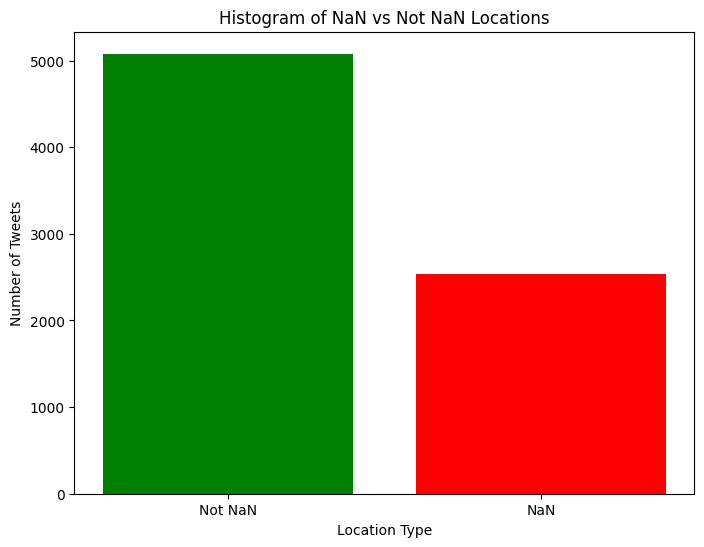

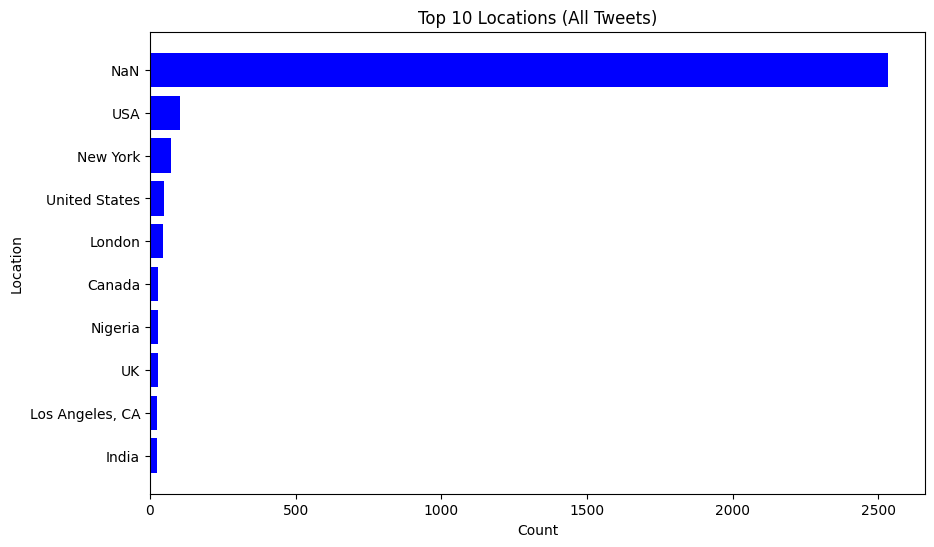

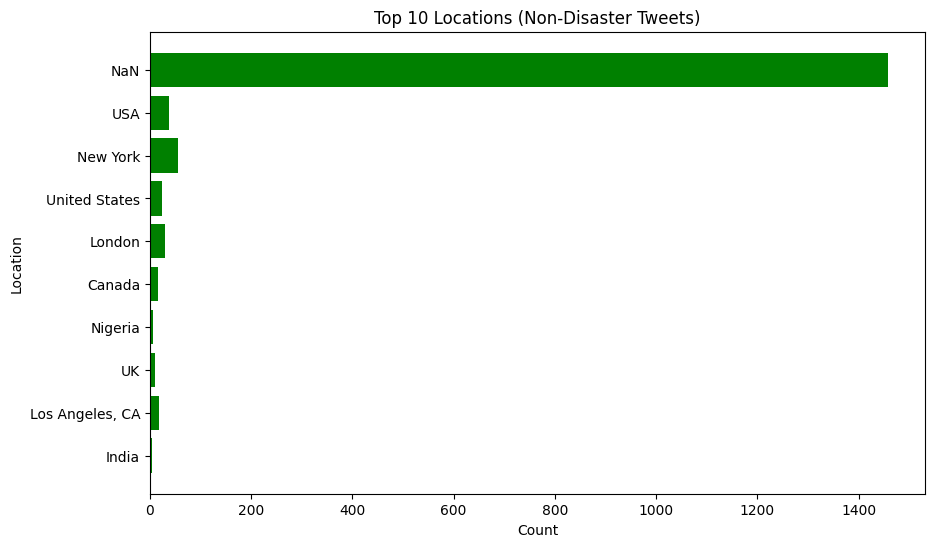

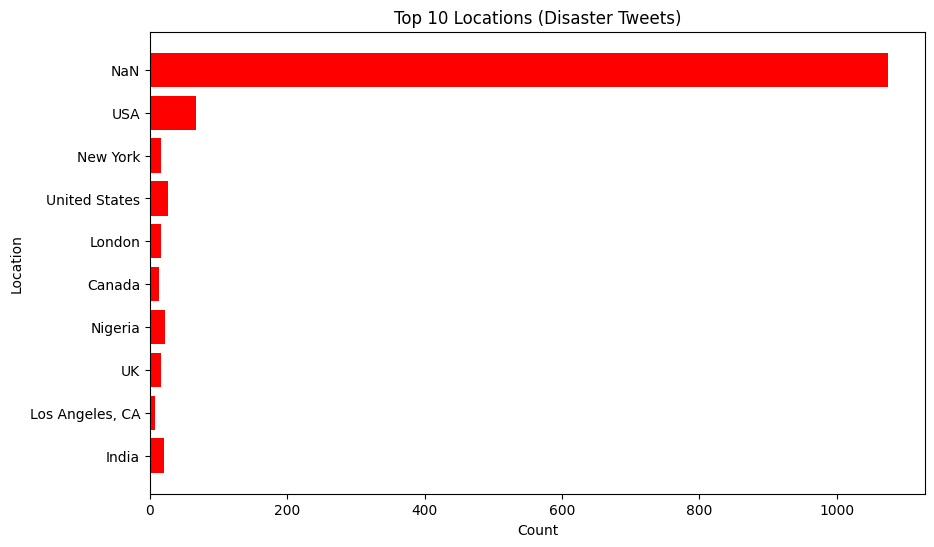

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to count occurrences of a word
def word_counter(word, word_list):
    return word_list.count(word)

# Function to convert 'NaN' values to string 'NaN'
def nan_type_conv(word_list):
    for i in range(len(word_list)):
        if pd.isna(word_list[i]):
            word_list[i] = 'NaN'

# Processing location data for the main dataframe
location = list(data_train["location"])
nan_type_conv(location)
location_unique = list(set(location))
location_unique_count = [word_counter(word, location) for word in location_unique]

# Processing location data for non-disaster tweets
location_0 = list(data_train_0["location"])
nan_type_conv(location_0)
location_0_unique_count = [word_counter(word, location_0) for word in location_unique]

# Processing location data for disaster tweets
location_1 = list(data_train_1["location"])
nan_type_conv(location_1)
location_1_unique_count = [word_counter(word, location_1) for word in location_unique]

# Creating a DataFrame to hold location data
location_df = pd.DataFrame()
location_df["location"] = location_unique
location_df["count (all tweets)"] = location_unique_count
location_df["proportion (all tweets)"] = [count / len(location) for count in location_unique_count]
location_df["count (non-disaster tweets)"] = location_0_unique_count
location_df["proportion (non-disaster tweets)"] = [count / len(location_0) for count in location_0_unique_count]
location_df["count (disaster tweets)"] = location_1_unique_count
location_df["proportion (disaster tweets)"] = [count / len(location_1) for count in location_1_unique_count]
location_df["absolute difference"] = abs(location_df["proportion (disaster tweets)"] - location_df["proportion (non-disaster tweets)"])

# Visualizing the distribution of 'NaN' vs 'Not NaN' locations with histograms
nan_location_count = word_counter('NaN', location)
not_nan_location_count = len(location) - nan_location_count

plt.figure(figsize=(8, 6))
plt.bar(["Not NaN", "NaN"], [not_nan_location_count, nan_location_count], color=["green", "red"])
plt.title("Histogram of NaN vs Not NaN Locations")
plt.xlabel("Location Type")
plt.ylabel("Number of Tweets")
plt.show()

# Visualizing the top locations across all tweets
location_df_sorted = location_df.sort_values(by="count (all tweets)", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(location_df_sorted["location"], location_df_sorted["count (all tweets)"], color='blue', label="All Tweets")
plt.title("Top 10 Locations (All Tweets)")
plt.xlabel("Count")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

# Visualizing the top locations in non-disaster tweets
plt.figure(figsize=(10, 6))
plt.barh(location_df_sorted["location"], location_df_sorted["count (non-disaster tweets)"], color='green', label="Non-Disaster Tweets")
plt.title("Top 10 Locations (Non-Disaster Tweets)")
plt.xlabel("Count")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

# Visualizing the top locations in disaster tweets
plt.figure(figsize=(10, 6))
plt.barh(location_df_sorted["location"], location_df_sorted["count (disaster tweets)"], color='red', label="Disaster Tweets")
plt.title("Top 10 Locations (Disaster Tweets)")
plt.xlabel("Count")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()


The histograms provide a detailed view of the distribution of location data in the tweet dataset.

* This chart highlights the proportion of tweets that either include or omit location information. A higher count of Not NaN locations suggests that the majority of tweets provide geographic data, which is valuable for spatial analysis. Conversely, a significant presence of NaN values indicates missing location data, which could hinder efforts to correlate tweets with specific regions.

* This chart identifies the most frequently mentioned locations across all tweets, offering insight into which areas are most discussed within the dataset. This can help in understanding general geographic trends and identifying regions of interest.

* Here, the focus is on locations mentioned in non-disaster tweets. These locations may represent regions where ordinary events or discussions are taking place, thus serving as a baseline for comparison with disaster-related locations.

* This chart shows locations frequently associated with disaster tweets. These locations are critical in understanding where disaster-related content is concentrated, potentially indicating areas affected by events or locations often linked with disaster discussions on social media.

These insights can be pivotal for targeted disaster response, trend analysis, or geographic profiling based on tweet content.

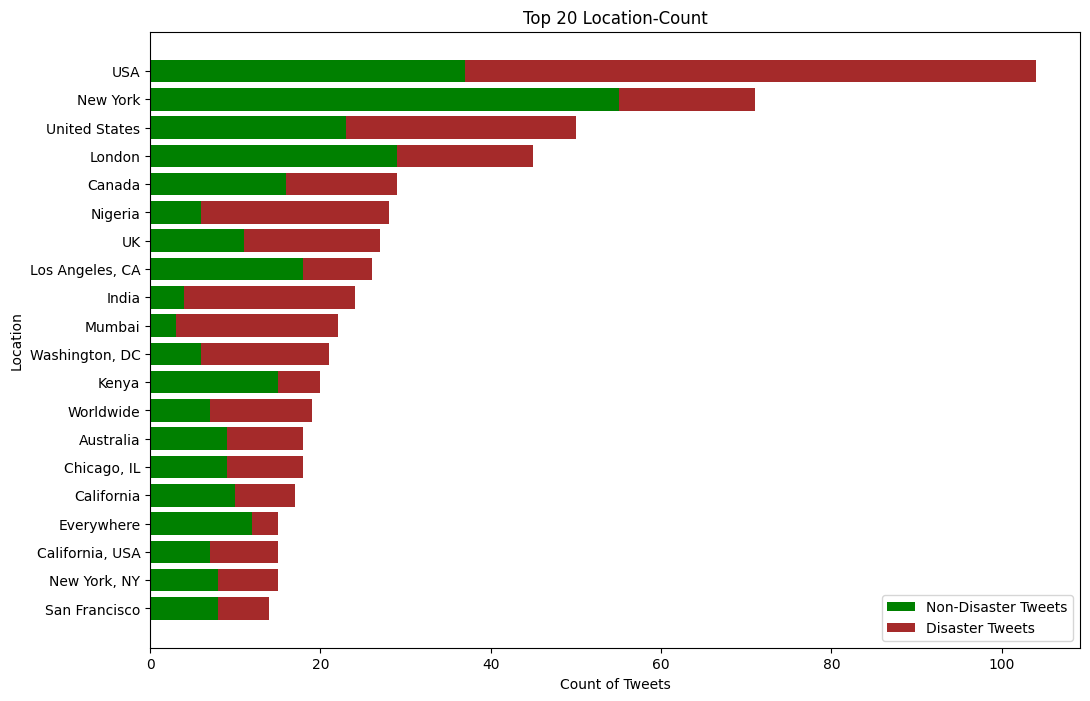

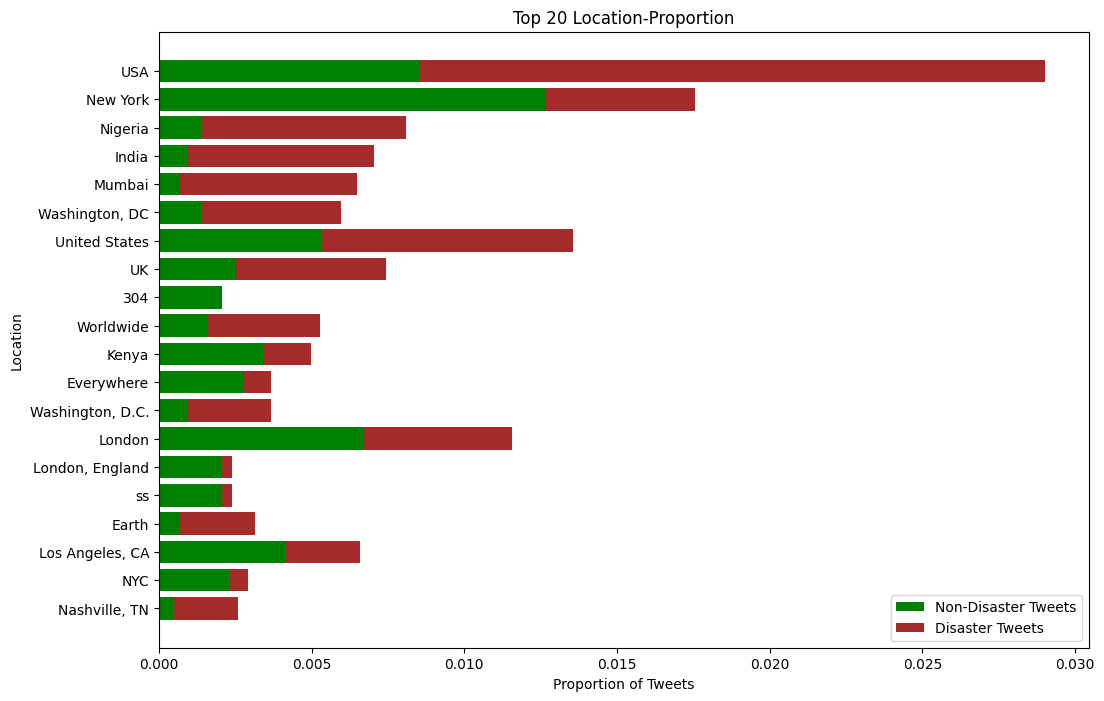

In [38]:
import matplotlib.pyplot as plt

# Function to create a classwise comparison barplot
def classwise_comparison_barplot(df, n, feature, non_disaster, disaster, xlabel, ylabel, title):
    df_top_n = df.head(n)  # Select the top 'n' rows
    plt.figure(figsize=(12, 8))
    
    # Create a horizontal bar plot for non-disaster and disaster tweet counts/proportions
    plt.barh(df_top_n[feature], df_top_n[non_disaster], color='green', label='Non-Disaster Tweets')
    plt.barh(df_top_n[feature], df_top_n[disaster], color='brown', left=df_top_n[non_disaster], label='Disaster Tweets')
    
    plt.xlabel(ylabel)
    plt.ylabel(xlabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

# Classwise location-count
location_df_count = (
    location_df[["location", "count (all tweets)", "count (non-disaster tweets)", "count (disaster tweets)"]]
    .sort_values(by="count (all tweets)", ascending=False)
)

# Dropping rows where the location is 'NaN'
location_df_count = location_df_count[location_df_count['location'] != 'NaN']

# Plotting top 20 locations by count
classwise_comparison_barplot(df=location_df_count,
                             n=20,
                             feature="location",
                             non_disaster="count (non-disaster tweets)",
                             disaster="count (disaster tweets)",
                             xlabel="Location",
                             ylabel="Count of Tweets",
                             title="Top 20 Location-Count")

# Classwise location-proportion
location_df_proportion = (
    location_df[["location", "proportion (non-disaster tweets)", "proportion (disaster tweets)", "absolute difference"]]
    .sort_values(by="absolute difference", ascending=False)
)

# Dropping rows where the location is 'NaN'
location_df_proportion = location_df_proportion[location_df_proportion['location'] != 'NaN']

# Plotting top 20 locations by proportion difference
classwise_comparison_barplot(df=location_df_proportion,
                             n=20,
                             feature="location",
                             non_disaster="proportion (non-disaster tweets)",
                             disaster="proportion (disaster tweets)",
                             xlabel="Location",
                             ylabel="Proportion of Tweets",
                             title="Top 20 Location-Proportion")


This Python script is designed to analyze and visualize the distribution of locations mentioned in tweets, categorizing them into disaster-related and non-disaster tweets. The analysis is performed in two parts: examining the raw count of locations across tweet categories and analyzing the proportion of these locations relative to the total number of tweets in each category. The goal is to identify locations that are either popular across all tweets or are particularly distinctive to disaster-related tweets.

We examine the distribution of number of words per tweet for both the class of non-disaster tweets and the class of disaster tweets.

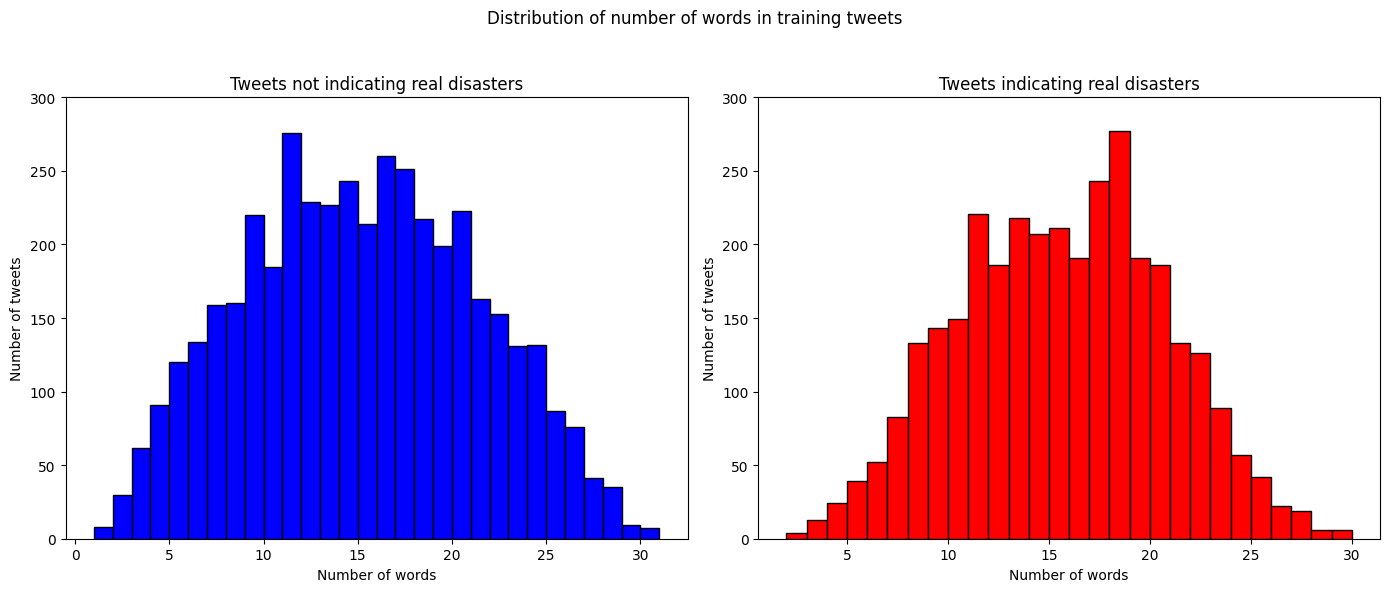

In [39]:
import matplotlib.pyplot as plt

# Function to calculate the number of words in tweets
def count_words(text_series):
    return text_series.str.split().map(len)

# Refactor: Distribution of number of words in tweets
data_train_0_word_count = count_words(data_train_0["text"])
data_train_1_word_count = count_words(data_train_1["text"])

# Function to create a classwise comparison subplot
def classwise_comparison_subplot(feature_train_0, feature_train_1, binwidth, title_0, title_1, ylimit, xlabel, ylabel, suptitle):
    plt.figure(figsize=(14, 6))
    
    # Subplot for non-disaster tweets
    plt.subplot(1, 2, 1)
    plt.hist(feature_train_0, bins=range(min(feature_train_0), max(feature_train_0) + binwidth, binwidth), color='blue', edgecolor='black')
    plt.title(title_0)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Subplot for disaster tweets
    plt.subplot(1, 2, 2)
    plt.hist(feature_train_1, bins=range(min(feature_train_1), max(feature_train_1) + binwidth, binwidth), color='red', edgecolor='black')
    plt.title(title_1)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Super title for the entire figure
    plt.suptitle(suptitle)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plotting the distribution of the number of words in tweets
classwise_comparison_subplot(
    feature_train_0=data_train_0_word_count,
    feature_train_1=data_train_1_word_count,
    binwidth=1,
    title_0="Tweets not indicating real disasters",
    title_1="Tweets indicating real disasters",
    ylimit=300,
    xlabel="Number of words",
    ylabel="Number of tweets",
    suptitle="Distribution of number of words in training tweets"
)


The disaster-related tweets tend to be slightly longer on average compared to non-disaster tweets. This is indicated by the higher central peak in the red histogram, suggesting that people may use more words when discussing real disasters, potentially to convey more detailed information or to express concern.

Both distributions have a similar spread, with most tweets containing between 5 and 25 words. However, disaster-related tweets have a slightly wider spread, indicating a higher variability in the length of tweets.

These histograms are crucial for understanding the linguistic patterns in tweets related to disasters versus non-disasters. This information could be useful for designing text classification models, where tweet length might be a feature.

The observed difference in tweet length distributions can be used as a feature in machine learning models to improve the accuracy of classifying tweets as disaster-related or not.

The difference in tweet lengths can also provide insights into how users communicate during disasters, which could be relevant for emergency response strategies or social media analysis.

Next we analyze the distribution of average word-length in tweets for both the class of non-disaster tweets and the class of disaster tweets.

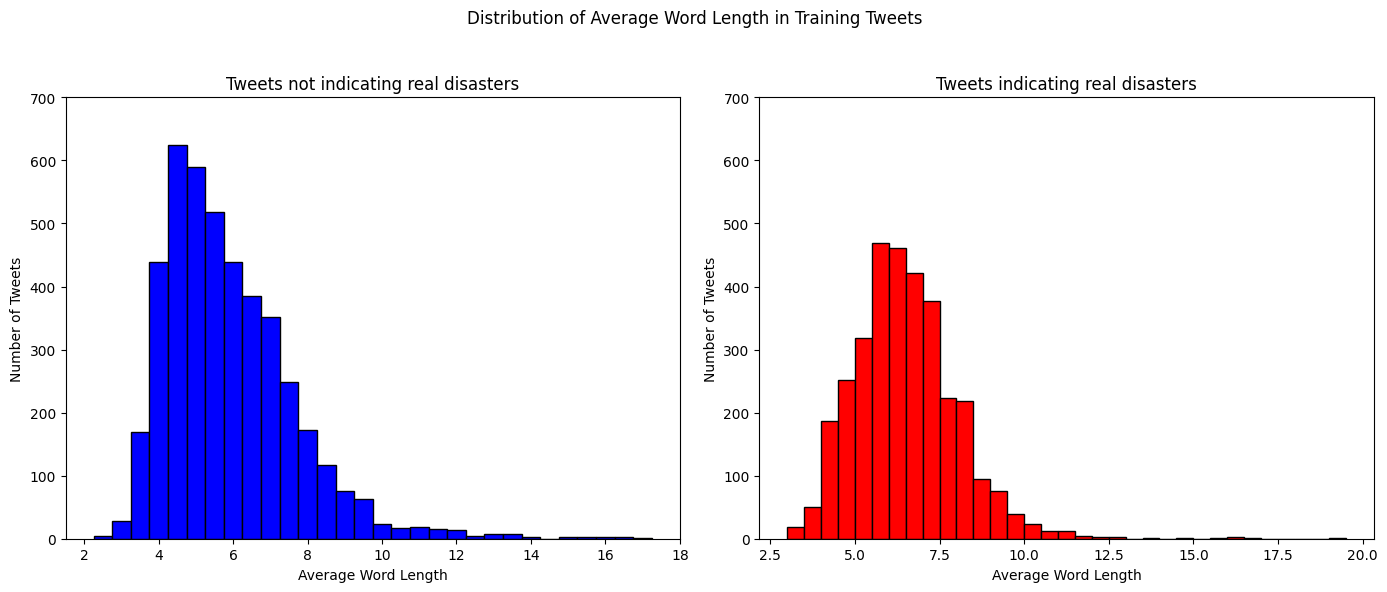

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the average word length in a series of tweets
def calculate_avg_word_length(text_series):
    return text_series.str.split().apply(lambda words: np.mean([len(word) for word in words]))

# Refactor: Distribution of average word-length in tweets
data_train_0_avg = calculate_avg_word_length(data_train_0["text"])
data_train_1_avg = calculate_avg_word_length(data_train_1["text"])

# Function to create a classwise comparison subplot
def classwise_comparison_subplot(feature_train_0, feature_train_1, binwidth, title_0, title_1, ylimit, xlabel, ylabel, suptitle):
    plt.figure(figsize=(14, 6))
    
    # Subplot for non-disaster tweets
    plt.subplot(1, 2, 1)
    plt.hist(feature_train_0, bins=np.arange(min(feature_train_0), max(feature_train_0) + binwidth, binwidth), color='blue', edgecolor='black')
    plt.title(title_0)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Subplot for disaster tweets
    plt.subplot(1, 2, 2)
    plt.hist(feature_train_1, bins=np.arange(min(feature_train_1), max(feature_train_1) + binwidth, binwidth), color='red', edgecolor='black')
    plt.title(title_1)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Super title for the entire figure
    plt.suptitle(suptitle)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plotting the distribution of average word length in tweets
classwise_comparison_subplot(
    feature_train_0=data_train_0_avg,
    feature_train_1=data_train_1_avg,
    binwidth=0.5,
    title_0="Tweets not indicating real disasters",
    title_1="Tweets indicating real disasters",
    ylimit=700,
    xlabel="Average Word Length",
    ylabel="Number of Tweets",
    suptitle="Distribution of Average Word Length in Training Tweets"
)


Analyzing the distribution of average word length in tweets for both non-disaster and disaster tweet classes is crucial for several reasons, particularly in the context of natural language processing (NLP) and machine learning tasks such as text classification, sentiment analysis, and emergency response systems.

- By understanding the distribution of word lengths, we can identify patterns that distinguish disaster-related tweets from non-disaster ones. For instance, disaster-related tweets might contain more technical terms, names of places, or specific disaster-related vocabulary, which might affect the average word length. In contrast, non-disaster tweets could have more casual language, which may consist of shorter words.
- Average word length can be an important feature in a machine learning model. If disaster-related tweets consistently have longer or shorter words on average, this feature can help improve the model's accuracy in predicting whether a tweet is disaster-related or not.
- Analyzing word length provides insights into how people communicate during emergencies. During disasters, users might use longer, more formal words to provide detailed descriptions or share critical information. In contrast, non-disaster tweets might reflect more casual, everyday language with shorter words. Understanding this behavior can help tailor communication strategies in emergency response scenarios.
- Tweets with longer average word lengths might convey more detailed information, which could be vital for identifying key information in disaster scenarios. By focusing on tweets with higher information density, responders can quickly prioritize and act on the most relevant content.
- Longer words may indicate a more complex emotional or cognitive state, which could be relevant in sentiment analysis. For example, during disasters, users might use longer, more descriptive words to convey their emotions or describe situations, whereas non-disaster tweets may use shorter, more colloquial language.
- Understanding word length distribution helps in preprocessing the data. If certain lengths are indicative of spam or irrelevant content, they can be filtered out to improve the quality of the dataset and the performance of downstream tasks.


**Analysis**

Category: "Tweets not indicating real disasters"
- The histogram shows that the average word length for non-disaster tweets generally falls between 3.5 and 7.5 characters. The peak of the distribution is around 4.5 to 6.5 characters, where the majority of tweets are concentrated. This indicates that non-disaster tweets tend to have shorter, more casual words.
- There is a noticeable drop-off in the frequency of tweets as the average word length increases beyond 7.5 characters, indicating that fewer non-disaster tweets use longer words.


Category: "Tweets indicating real disasters"

- The average word length in disaster-related tweets shows a similar distribution to non-disaster tweets but is slightly skewed towards longer words. The peak is around 5.5 to 7 characters, suggesting that disaster-related tweets may use slightly longer words on average, potentially to convey more specific or technical information.
- Similar to non-disaster tweets, there is a decline in frequency as the average word length exceeds 8 characters. However, disaster tweets have a more gradual decline, with some tweets even having an average word length close to 10 characters.

We examine the distribution of number of URLs per tweet for both the class of non-disaster tweets and the class of disaster tweets.

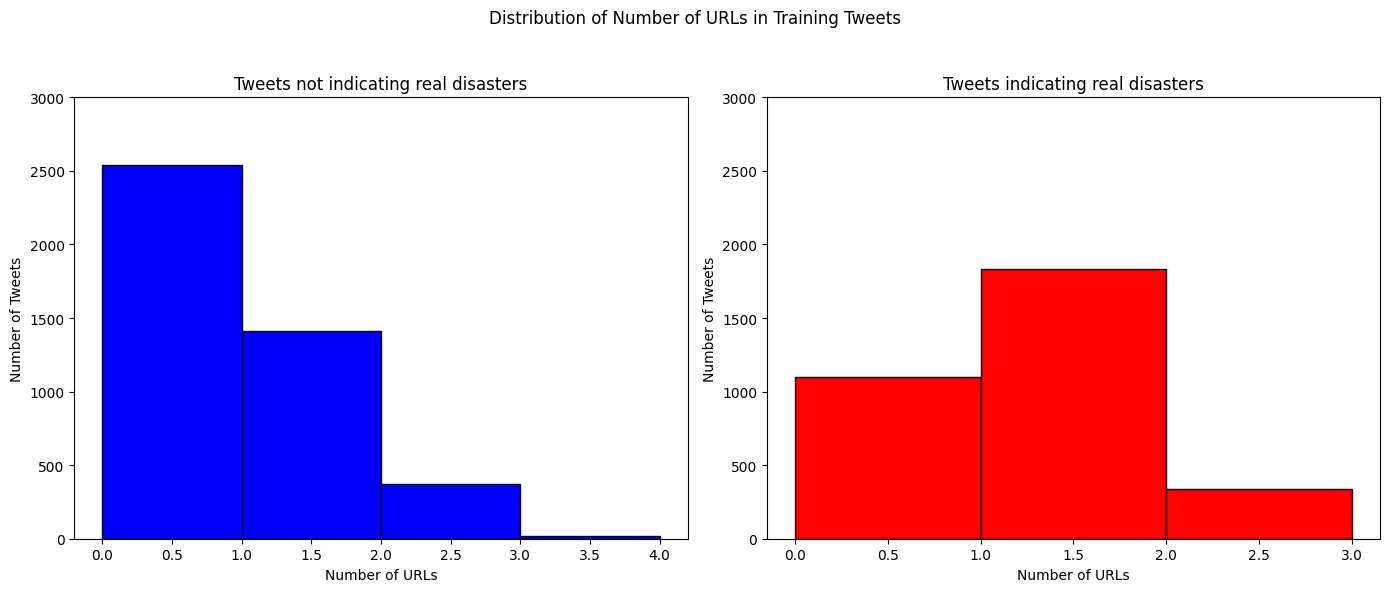

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to count the number of URLs in a tweet
def count_urls(text_series):
    return text_series.apply(lambda x: len([word for word in str(x).lower().split() if 'http' in word or 'https' in word]))

# Refactor: Count the number of URLs in tweets
url_train_0_count = count_urls(data_train_0["text"])
url_train_1_count = count_urls(data_train_1["text"])

# Function to create a classwise comparison subplot
def classwise_comparison_subplot(feature_train_0, feature_train_1, binwidth, title_0, title_1, ylimit, xlabel, ylabel, suptitle):
    plt.figure(figsize=(14, 6))
    
    # Subplot for non-disaster tweets
    plt.subplot(1, 2, 1)
    plt.hist(feature_train_0, bins=range(min(feature_train_0), max(feature_train_0) + binwidth, binwidth), color='blue', edgecolor='black')
    plt.title(title_0)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Subplot for disaster tweets
    plt.subplot(1, 2, 2)
    plt.hist(feature_train_1, bins=range(min(feature_train_1), max(feature_train_1) + binwidth, binwidth), color='red', edgecolor='black')
    plt.title(title_1)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Super title for the entire figure
    plt.suptitle(suptitle)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plotting the distribution of the number of URLs in tweets
classwise_comparison_subplot(
    feature_train_0=url_train_0_count,
    feature_train_1=url_train_1_count,
    binwidth=1,
    title_0="Tweets not indicating real disasters",
    title_1="Tweets indicating real disasters",
    ylimit=3000,
    xlabel="Number of URLs",
    ylabel="Number of Tweets",
    suptitle="Distribution of Number of URLs in Training Tweets"
)


The graphics provided show histograms depicting the distribution of the number of URLs in tweets that do not indicate real disasters (left, blue) and tweets that do indicate real disasters (right, red). These histograms are crucial for understanding how URLs are used differently in tweets depending on whether they are related to disasters or not.


Both histograms show a distribution of tweets based on the number of URLs they contain. The majority of tweets in both categories contain either 0 or 1 URL, with the frequency decreasing as the number of URLs increases.

Tweets not indicating real disasters (Left, Blue):

* The most significant portion of non-disaster tweets contains 0 URLs, indicating that many of these tweets do not include links.
* There is a notable number of tweets containing 1 URL, which could represent tweets that include links to external content such as news articles, blogs, or other non-urgent information.
* Very few tweets have more than 1 URL, which suggests that non-disaster tweets are less likely to include multiple links, possibly because they are more casual in nature or because the content does not require multiple references.

Tweets indicating real disasters (Right, Red):

* Interestingly, disaster-related tweets show a slightly different pattern. While there is still a substantial number of tweets with 0 URLs, the most frequent category is tweets with 1 URL. This indicates that disaster-related tweets are more likely to include at least one link, possibly to direct readers to critical information, updates, or resources related to the disaster.
* A noticeable number of disaster tweets also include 2 URLs, which might suggest an effort to provide multiple sources of information or to direct users to various aspects of the disaster, such as live updates, relief efforts, or official statements.
* The presence of tweets with multiple URLs in disaster-related content could reflect the importance of providing comprehensive and credible information during emergencies.

Disaster-related tweets are more likely to contain URLs compared to non-disaster tweets. This is expected, as such tweets often need to direct users to further information, whether it’s a news update, official communication, or a resource for assistance.

The number of URLs in a tweet could be a valuable feature for machine learning models aimed at classifying tweets as disaster-related or not. Tweets with multiple URLs might be more indicative of disaster-related content, especially when combined with other features such as the presence of specific keywords or hashtags.


We examine the distribution of number of hashtags per tweet for both the class of non-disaster tweets and the class of disaster tweets.

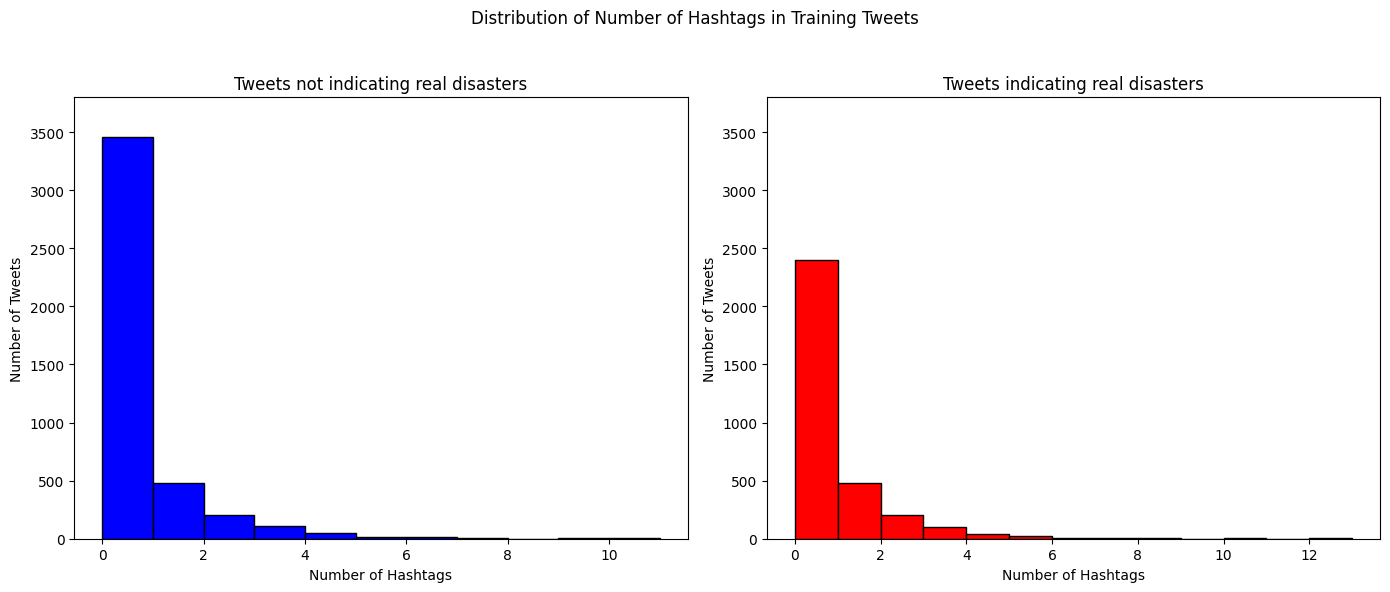

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to count the number of hashtags in a tweet
def count_hashtags(text_series):
    return text_series.apply(lambda x: str(x).count('#'))

# Refactor: Count the number of hashtags in tweets
hashtag_train_0_count = count_hashtags(data_train_0["text"])
hashtag_train_1_count = count_hashtags(data_train_1["text"])

# Function to create a classwise comparison subplot
def classwise_comparison_subplot(feature_train_0, feature_train_1, binwidth, title_0, title_1, ylimit, xlabel, ylabel, suptitle):
    plt.figure(figsize=(14, 6))
    
    # Subplot for non-disaster tweets
    plt.subplot(1, 2, 1)
    plt.hist(feature_train_0, bins=range(min(feature_train_0), max(feature_train_0) + binwidth, binwidth), color='blue', edgecolor='black')
    plt.title(title_0)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Subplot for disaster tweets
    plt.subplot(1, 2, 2)
    plt.hist(feature_train_1, bins=range(min(feature_train_1), max(feature_train_1) + binwidth, binwidth), color='red', edgecolor='black')
    plt.title(title_1)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Super title for the entire figure
    plt.suptitle(suptitle)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plotting the distribution of the number of hashtags in tweets
classwise_comparison_subplot(
    feature_train_0=hashtag_train_0_count,
    feature_train_1=hashtag_train_1_count,
    binwidth=1,
    title_0="Tweets not indicating real disasters",
    title_1="Tweets indicating real disasters",
    ylimit=3800,
    xlabel="Number of Hashtags",
    ylabel="Number of Tweets",
    suptitle="Distribution of Number of Hashtags in Training Tweets"
)


The graphics provided show histograms that depict the distribution of the number of hashtags in tweets that do not indicate real disasters (left, blue) and tweets that do indicate real disasters (right, red). These visualizations are crucial for understanding how hashtags are used in different contexts within the dataset, particularly in distinguishing between disaster-related and non-disaster-related tweets.

Both histograms display a right-skewed distribution, meaning that most tweets, regardless of their category, contain a small number of hashtags. The number of tweets decreases as the number of hashtags increases.

Tweets Not Indicating Real Disasters (Left, Blue):

* The majority of these tweets contain 0 or 1 hashtag. This suggests that in general, tweets that are not related to disasters are less likely to contain hashtags, or they might contain just one.
* There is a noticeable drop-off in the number of tweets with 2 or more hashtags, and very few tweets contain more than 5 hashtags. This could indicate that non-disaster tweets are often less promotional or are not part of larger hashtag-driven campaigns or trends, which are typically characterized by the use of multiple hashtags.

Tweets Indicating Real Disasters (Right, Red):

* Similarly, the majority of disaster-related tweets also contain 0 or 1 hashtag, but there is a slightly higher count of tweets with multiple hashtags compared to non-disaster tweets.
* This might suggest that when tweets are related to disasters, there is a higher tendency to include more than one hashtag, possibly to reach a broader audience or to tag the content with multiple relevant keywords (e.g., #earthquake, #emergency).

However, the general trend is similar to non-disaster tweets, where the number of tweets declines sharply as the number of hashtags increases.

* The use of hashtags is a common feature in both types of tweets, but there is a marginally higher tendency for disaster-related tweets to use multiple hashtags. This could be attributed to the need to increase visibility or to associate the tweet with multiple aspects of the disaster (e.g., the event, the location, and the response).
* For machine learning models, the number of hashtags could serve as a useful feature in distinguishing between disaster and non-disaster tweets. Tweets with more hashtags might be slightly more indicative of disaster-related content, though this feature would likely need to be used in conjunction with other features for better predictive power.

Understanding hashtag distribution can help in optimizing social media strategies during disasters. For instance, emergency response teams might analyze such data to determine the most effective number of hashtags to use for broad dissemination of critical information.

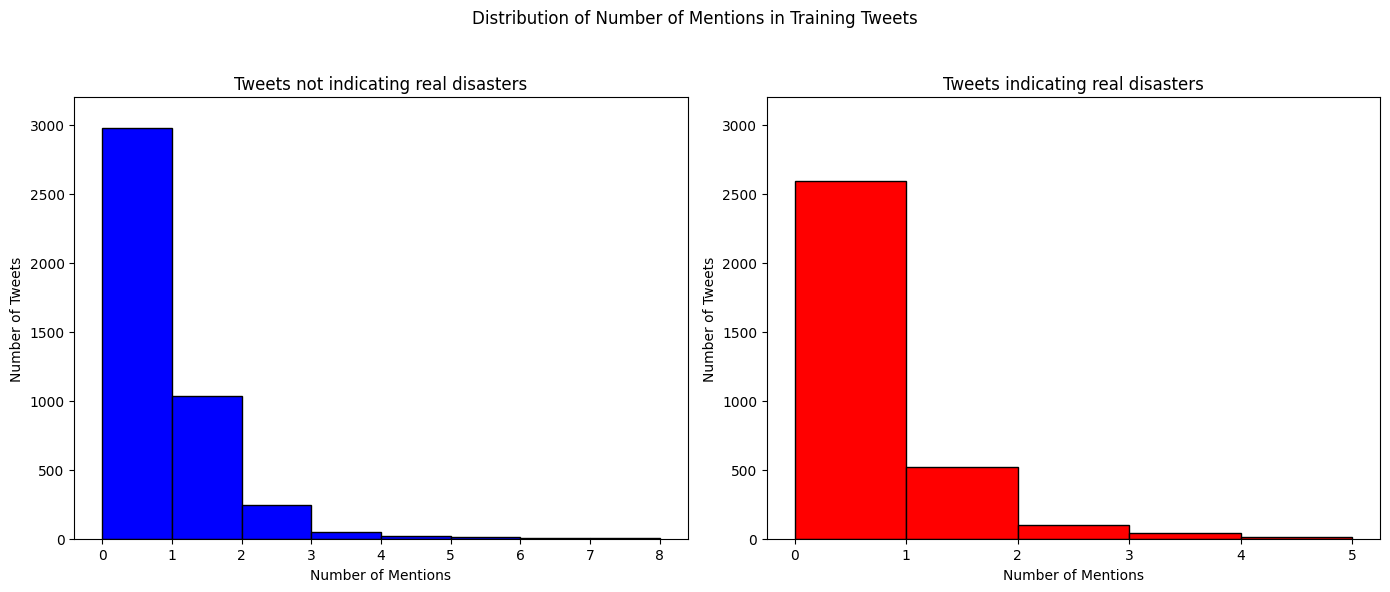

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to count the number of mentions in a tweet
def count_mentions(text_series):
    return text_series.apply(lambda x: str(x).count('@'))

# Refactor: Count the number of mentions in tweets
mention_train_0_count = count_mentions(data_train_0["text"])
mention_train_1_count = count_mentions(data_train_1["text"])

# Function to create a classwise comparison subplot
def classwise_comparison_subplot(feature_train_0, feature_train_1, binwidth, title_0, title_1, ylimit, xlabel, ylabel, suptitle):
    plt.figure(figsize=(14, 6))
    
    # Subplot for non-disaster tweets
    plt.subplot(1, 2, 1)
    plt.hist(feature_train_0, bins=range(min(feature_train_0), max(feature_train_0) + binwidth, binwidth), color='blue', edgecolor='black')
    plt.title(title_0)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Subplot for disaster tweets
    plt.subplot(1, 2, 2)
    plt.hist(feature_train_1, bins=range(min(feature_train_1), max(feature_train_1) + binwidth, binwidth), color='red', edgecolor='black')
    plt.title(title_1)
    plt.ylim(0, ylimit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Super title for the entire figure
    plt.suptitle(suptitle)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plotting the distribution of the number of mentions in tweets
classwise_comparison_subplot(
    feature_train_0=mention_train_0_count,
    feature_train_1=mention_train_1_count,
    binwidth=1,
    title_0="Tweets not indicating real disasters",
    title_1="Tweets indicating real disasters",
    ylimit=3200,
    xlabel="Number of Mentions",
    ylabel="Number of Tweets",
    suptitle="Distribution of Number of Mentions in Training Tweets"
)


We show the top punctuations for both the class of non-disaster tweets and the class of disaster tweets.

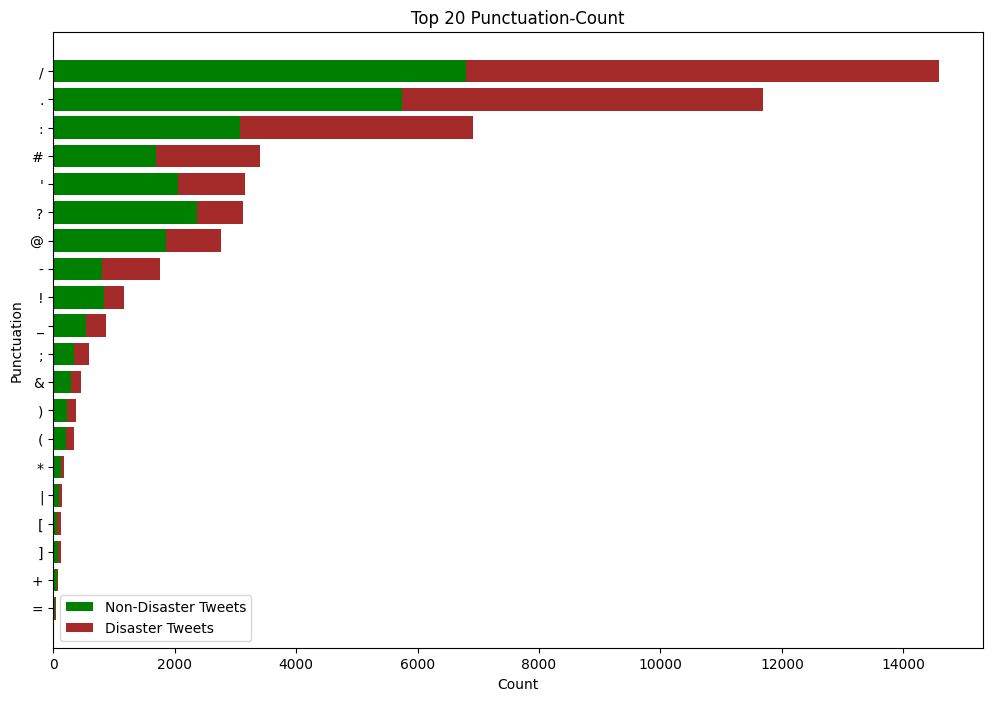

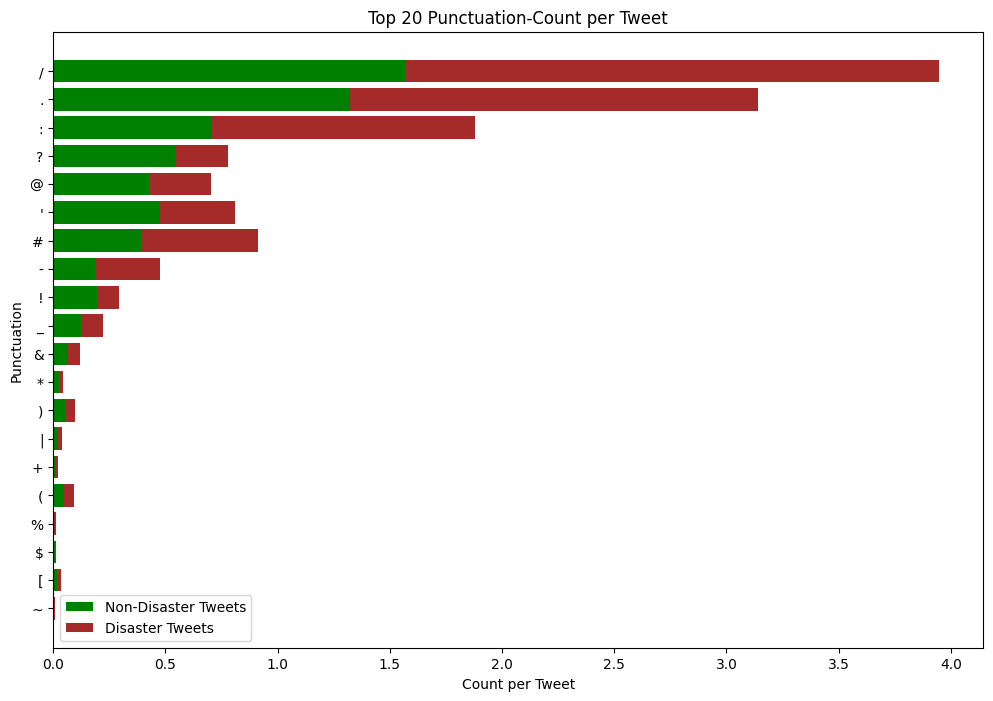

70884

In [44]:
import pandas as pd
import gc

# Function to extract and count punctuation marks in a text
def text_list_punct(text_series):
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    return text_series.apply(lambda text: [char for char in str(text) if char in punctuations])

# Function to count occurrences of a specific item in a list
def word_counter(item, item_list):
    return item_list.count(item)

# Refactor: Process and analyze punctuation marks in tweets
punct_train = text_list_punct(data_train["text"])
punct_train_0 = text_list_punct(data_train_0["text"])
punct_train_1 = text_list_punct(data_train_1["text"])

punct_train_unique = list(set(punct_train.explode().unique()))

# Classwise punctuation-count
punct_count_non_disaster = [word_counter(punct, punct_train_0.explode().tolist()) for punct in punct_train_unique]
punct_count_disaster = [word_counter(punct, punct_train_1.explode().tolist()) for punct in punct_train_unique]

punct_count = pd.DataFrame({
    "punctuation": punct_train_unique,
    "count (non-disaster tweets)": punct_count_non_disaster,
    "count (disaster tweets)": punct_count_disaster,
})
punct_count["count (all tweets)"] = punct_count["count (non-disaster tweets)"] + punct_count["count (disaster tweets)"]
punct_count.sort_values(by=["count (all tweets)", "count (non-disaster tweets)", "count (disaster tweets)"], ascending=False, inplace=True)

classwise_comparison_barplot(
    df=punct_count,
    n=20,
    feature="punctuation",
    non_disaster="count (non-disaster tweets)",
    disaster="count (disaster tweets)",
    xlabel="Punctuation",
    ylabel="Count",
    title="Top 20 Punctuation-Count"
)

# Classwise punctuation-count per tweet
punct_count_per_non_disaster_tweet = [word_counter(punct, punct_train_0.explode().tolist()) / len(data_train_0) for punct in punct_train_unique]
punct_count_per_disaster_tweet = [word_counter(punct, punct_train_1.explode().tolist()) / len(data_train_1) for punct in punct_train_unique]

punct_count_per_tweet = pd.DataFrame({
    "punctuation": punct_train_unique,
    "count per non-disaster tweet": punct_count_per_non_disaster_tweet,
    "count per disaster tweet": punct_count_per_disaster_tweet,
})
punct_count_per_tweet["absolute difference"] = abs(punct_count_per_tweet["count per non-disaster tweet"] - punct_count_per_tweet["count per disaster tweet"])
punct_count_per_tweet.sort_values(by=["absolute difference", "count per disaster tweet", "count per non-disaster tweet"], ascending=False, inplace=True)

classwise_comparison_barplot(
    df=punct_count_per_tweet,
    n=20,
    feature="punctuation",
    non_disaster="count per non-disaster tweet",
    disaster="count per disaster tweet",
    xlabel="Punctuation",
    ylabel="Count per Tweet",
    title="Top 20 Punctuation-Count per Tweet"
)

# Cleanup
del punct_count, punct_count_per_tweet
gc.collect()


The results depicted in the two bar charts are from the code that analyzed the distribution of punctuation marks in tweets, comparing their usage between non-disaster tweets (in green) and disaster-related tweets (in red).

Top 20 Punctuation-Count:

* The first bar chart shows the absolute counts of the top 20 most frequently used punctuation marks in both non-disaster and disaster-related tweets. The period (.) and comma (,) are the most frequently used punctuation marks in both categories. However, disaster-related tweets contain a significantly higher number of periods and commas compared to non-disaster tweets.
* The hashtag (#) symbol also shows considerable usage, with disaster tweets having a slightly higher count, suggesting that hashtags are commonly used in both categories but may be more prominent in disaster tweets.
* Other symbols like the exclamation mark (!), question mark (?), and at symbol (@) show balanced usage, but disaster tweets still tend to use them slightly more, indicating a higher emphasis or urgency in communication.
* The presence of symbols like the colon (:) and semicolon (;) in disaster tweets could indicate more structured information sharing or emphasis on certain details.

Top 20 Punctuation-Count Per Tweet:

* The second bar chart displays the count of punctuation marks per tweet in each category. The pattern here is similar, with disaster tweets generally having more punctuation marks per tweet. This suggests that disaster-related tweets are more likely to use punctuation to convey detailed or urgent information.
* The difference in the punctuation count per tweet is smaller compared to the absolute counts, indicating that while disaster tweets tend to have more punctuation overall, non-disaster tweets also make considerable use of punctuation.
* Symbols like the period, comma, and hashtag are again prominent, reaffirming their importance in structuring tweets and potentially increasing visibility through hashtags in disaster communication.
* Disaster-related tweets use more punctuation marks, possibly reflecting a need to structure detailed information or convey urgency. The frequent use of periods, commas, and hashtags suggests a more formal or informational tone in disaster tweets compared to non-disaster tweets.
* The higher punctuation count in disaster tweets per tweet could indicate that these tweets are more information-dense, packing more structured content into each tweet.
* These insights could be valuable in natural language processing tasks, such as tweet classification or sentiment analysis, where punctuation usage might serve as a distinguishing feature between disaster-related and non-disaster tweets.

In [45]:
!pip install pyspellchecker
from spellchecker import SpellChecker

We integrate the text_normalizer function into the provided code for both data_train and data_test datasets.

In [49]:
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.stem import PorterStemmer
import spacy

# Ensure necessary resources are available
nltk.download('stopwords')
nltk.download('punkt')

# Load spacy model
spacy_lemmatizer = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Load acronym and contraction dictionaries
acronyms_dict = pd.read_json('/kaggle/input/acronyms-contractions/english_acronyms_lowercase.json', typ='series')
contractions_dict = pd.read_json('/kaggle/input/acronyms-contractions/english_contractions_lowercase.json', typ='series')

# Preload lists for efficiency
acronyms_list = list(acronyms_dict.keys())
contractions_list = list(contractions_dict.keys())
stops = stopwords.words("english")
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"]
allstops = stops + addstops

# Additional stopwords
alphabets = list("abcdefghijklmnopqrstuvwxyz")
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
conjunctions = ["and", "but", "for", "nor", "or", "so", "yet", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "because", "before", "if", "once", "since", "so", "than", "that", "though", "till", "unless", "until", "when", "where", "whether", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + conjunctions + subordinating_conjunctions + others

# Function to normalize text
def text_normalizer(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove whitespace
    text = text.strip()
    
    # Convert text to one line
    text = re.sub('\n', '', text)
    
    # Remove square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    punct_str = string.punctuation.replace("'", "")  # keep apostrophes
    text = text.translate(str.maketrans("", "", punct_str))
    
    # Remove HTML tags
    html = re.compile(r'<.*?>')
    text = html.sub(r'', text)
    
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove URLs
    http_pattern = r"https?://\S+|www\.\S+"
    text = re.sub(http_pattern, "", text)
    
    # Convert acronyms
    words = text.split()
    text = " ".join([acronyms_dict[word] if word in acronyms_list else word for word in words])
    
    # Convert contractions
    words = text.split()
    text = " ".join([contractions_dict[word] if word in contractions_list else word for word in words])
    
    # Remove stopwords
    words = text.split()
    text = " ".join([word for word in words if word not in allstops])
    
    # Lemmatization
    text = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    
    # Discard non-alphabetic words
    words = text.split()
    text = " ".join([word for word in words if word.isalpha()])
    
    # Keep specific POS tags
    tokens_tagged = nltk.pos_tag(text.split())
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
    text = " ".join([word for word, pos in tokens_tagged if pos in keep_tags])
    
    # Remove additional stopwords
    words = text.split()
    text = " ".join([word for word in words if word not in additional_stops])
    
    return text

# Apply text normalization to training data
data_train["tokens"] = data_train["text"].apply(lambda x: word_tokenize(x))
data_train["keyword plus"] = data_train["keyword"].fillna(" ")
data_train["location plus"] = data_train["location"].fillna(" ")
data_train["text plus"] = data_train["keyword plus"] + " " + data_train["location plus"] + " " + data_train["text"]
data_train["tokens plus"] = data_train["text plus"].apply(lambda x: word_tokenize(x))

# Normalize the 'text' column using the text_normalizer function
data_train["normalized text"] = data_train["text"].apply(text_normalizer)
data_train["normalized tokens"] = data_train["normalized text"].apply(lambda x: word_tokenize(x))

# Normalize the combined 'keyword plus', 'location plus', and 'text' columns
data_train["normalized text plus"] = data_train["keyword plus"] + " " + data_train["location plus"] + " " + data_train["normalized text"]
data_train["normalized tokens plus"] = data_train["normalized text plus"].apply(lambda x: word_tokenize(x))

# View the updated dataframe
data_train_output = data_train[["id", "keyword", "location", "text", "normalized text plus", "normalized tokens plus", "target"]]
print(data_train_output.head())

# Apply text normalization to test data
data_test["tokens"] = data_test["text"].apply(lambda x: word_tokenize(x))
data_test["keyword plus"] = data_test["keyword"].fillna(" ")
data_test["location plus"] = data_test["location"].fillna(" ")
data_test["text plus"] = data_test["keyword plus"] + " " + data_test["location plus"] + " " + data_test["text"]
data_test["tokens plus"] = data_test["text plus"].apply(lambda x: word_tokenize(x))

# Normalize the 'text' column using the text_normalizer function
data_test["normalized text"] = data_test["text"].apply(text_normalizer)
data_test["normalized tokens"] = data_test["normalized text"].apply(lambda x: word_tokenize(x))

# Normalize the combined 'keyword plus', 'location plus', and 'text' columns
data_test["normalized text plus"] = data_test["keyword plus"] + " " + data_test["location plus"] + " " + data_test["normalized text"]
data_test["normalized tokens plus"] = data_test["normalized text plus"].apply(lambda x: word_tokenize(x))

# Create a copy for test target with placeholder
data_test_target = data_test.copy()
data_test_target['target'] = '?'
data_test_target_output = data_test_target[["id", "keyword", "location", "text", "normalized text plus", "normalized tokens plus", "target"]]
print(data_test_target_output.head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

                                normalized text plus  \
0                       deed reason earthquake allah   
1                             fire ronge sask canada   
2      resident ask shelter place officer evacuat...   
3      people receive wildfire evacuation order c...   
4        get phot

In [50]:
X = data_train['normalized text'].tolist()
y = data_train['target'].tolist()

In [51]:
del data_test_target
gc.collect()

15806

Counting words, bigrams, and trigrams, and displaying the top N results for non-disaster and disaster tweets is an essential step in the Natural Language Processing (NLP) pipeline.

* Counting the frequency of individual words in both non-disaster and disaster tweets helps identify common themes and topics within each category. For instance, words like “help” or “emergency” might be more prevalent in disaster tweets, while words like “happy” or “fun” might appear more in non-disaster tweets. This can provide an initial understanding of how language differs between the two categories, which is crucial for further analysis.
* Bigrams, or pairs of consecutive words, reveal more complex patterns in the data. For example, the bigram “stay safe” might frequently appear in disaster-related tweets, offering more contextual information than individual words alone. Bigrams help capture relationships between words that are often used together, thus enriching the understanding of common expressions or phrases specific to each category.
* Trigrams extend this concept further by examining sequences of three words. These can uncover even more specific patterns, such as “severe weather warning,” which might be highly indicative of disaster tweets. Trigrams are particularly useful for capturing fixed expressions or common phrases that can signal the nature of the tweet.
* The insights gained from counting and analyzing n-grams (unigrams, bigrams, trigrams) can directly influence feature engineering in machine learning models. Features based on the presence or frequency of specific n-grams can improve the model's ability to distinguish between disaster and non-disaster tweets. For example, if certain bigrams are strongly associated with disaster tweets, they can be used as features in a classification model to improve accuracy.
* Displaying the top N results for each category allows for a clear and concise comparison between non-disaster and disaster tweets. By visualizing the most frequent words, bigrams, and trigrams, analysts can quickly identify differences and similarities in language use. This comparison is crucial for understanding how people communicate differently in crisis situations versus everyday situations, informing strategies for automated text analysis, sentiment analysis, or emergency response systems.
* Finally, counting n-grams and displaying the results helps in making the model’s decisions more interpretable. If a model is heavily relying on certain n-grams to classify tweets, understanding what those n-grams are can provide transparency and insight into the model's behavior. This can be valuable for debugging, improving the model, or explaining its decisions to stakeholders.

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Function to count words, bigrams, or trigrams
def count_ngrams(text_list, ngram_range):
    CountVec = CountVectorizer(ngram_range=ngram_range)
    ngrams = CountVec.fit_transform(text_list)
    count_ngrams_df = pd.DataFrame()
    count_ngrams_df['Ngrams'] = CountVec.get_feature_names_out()
    count_ngrams_df['Frequency'] = ngrams.toarray().sum(axis=0)
    count_ngrams_df.sort_values(by='Frequency', ascending=False, inplace=True)
    return count_ngrams_df

# Function to count words
def count_words(text_list):
    return count_ngrams(text_list, (1, 1))

# Function to count bigrams
def count_bigrams(text_list):
    return count_ngrams(text_list, (2, 2))

# Function to count trigrams
def count_trigrams(text_list):
    return count_ngrams(text_list, (3, 3))

# Function to display side by side
def display_side_by_side(dataframes, titles):
    from IPython.display import display, HTML
    html_str = ''
    for df, title in zip(dataframes, titles):
        html_str += f'<div style="display: inline-block; padding:10px;"><h2>{title}</h2>{df.to_html(index=False)}</div>'
    display(HTML(html_str))

# Extract normalized text for non-disaster and disaster tweets
X_0 = data_train[data_train['target'] == 0]['normalized text'].tolist()
X_1 = data_train[data_train['target'] == 1]['normalized text'].tolist()

# Display top 10 words in non-disaster and disaster tweets
display_count_words = [count_words(X_0).head(10), count_words(X_1).head(10)]
display_title_words = ["Words in non-disaster tweets", "Words in disaster tweets"]
display_side_by_side(display_count_words, display_title_words)

# Display top 10 bigrams in non-disaster and disaster tweets
display_count_bigrams = [count_bigrams(X_0).head(10), count_bigrams(X_1).head(10)]
display_title_bigrams = ["Bigrams in non-disaster tweets", "Bigrams in disaster tweets"]
display_side_by_side(display_count_bigrams, display_title_bigrams)

# Display top 10 trigrams in non-disaster and disaster tweets
display_count_trigrams = [count_trigrams(X_0).head(10), count_trigrams(X_1).head(10)]
display_title_trigrams = ["Trigrams in non-disaster tweets", "Trigrams in disaster tweets"]
display_side_by_side(display_count_trigrams, display_title_trigrams)


Ngrams,Frequency
get,318
go,220
amp,162
make,125
see,121
body,114
say,104
know,102
love,102
think,95


Ngrams,Frequency
cross body,38
youtube video,34
body bag,30
reddit content,26
content policy,20
emergency service,18
fan army,17
burn building,17
prebreak well,17
fall cliff,16


Ngrams,Frequency
reddit content policy,20
stock market crash,16
policy go effect,15
movie trap miner,15
content policy go,15
effect subreddit ban,15
ignition knock detonation,15
go effect subreddit,15
subreddit ban quarantine,15
hollywood movie trap,14


### Models

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Training LSTM...
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6207 - loss: 0.6317 - val_accuracy: 0.7984 - val_loss: 0.4548
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8742 - loss: 0.3374 - val_accuracy: 0.8030 - val_loss: 0.4525
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9140 - loss: 0.2438 - val_accuracy: 0.7984 - val_loss: 0.4530
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9389 - loss: 0.1929 - val_accuracy: 0.7905 - val_loss: 0.5577
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9457 - loss: 0.1613 - val_accuracy: 0.7912 - val_loss: 0.5262
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9653 - loss: 0.1224 - val_accuracy: 0.7925 - val_loss: 0.6328
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9683 - loss: 0.1093 - val_accuracy: 0.7807 - val_loss: 0.8246
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9714 - loss: 0.0872 - val_accuracy: 0.7722 - val_loss: 0.

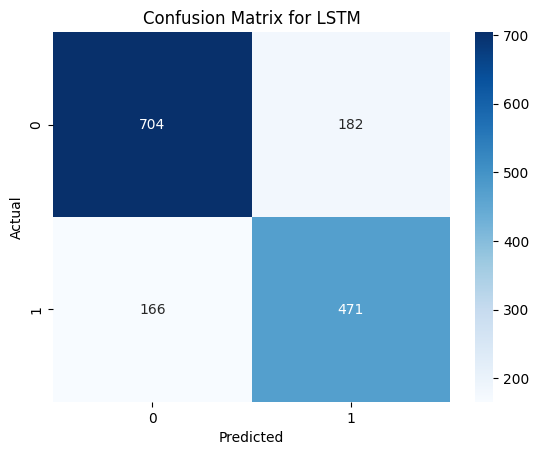

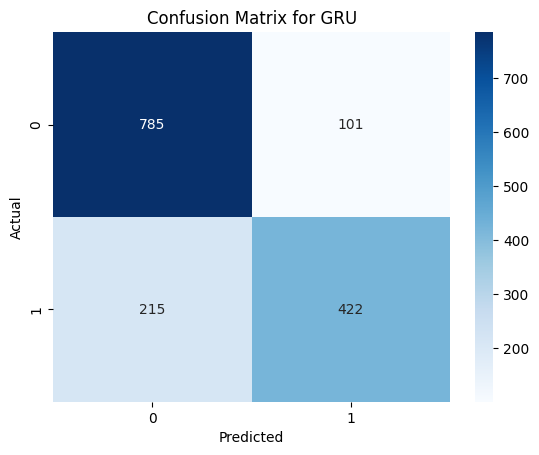

In [59]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary resources are available
nltk.download('stopwords')
nltk.download('punkt')

# Example data loading
# Assuming `data_train` is a pandas DataFrame containing your text data in a column "text"
# and labels in a column "target"
X = data_train["text"].values
y = data_train["target"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tokenizing the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding the sequences to ensure uniform length
max_length = max([len(x) for x in X_train_seq])  # Or set a fixed max length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Convert target variables to numpy arrays
y_train = np.array(y_train).astype('int32')
y_test = np.array(y_test).astype('int32')

# Now the sequences are ready to be used with LSTM and GRU

# Create a simple LSTM model
def create_lstm_model(input_length, vocab_size=10000):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a simple GRU model
def create_gru_model(input_length, vocab_size=10000):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length))
    model.add(Bidirectional(GRU(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(GRU(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize models with the correct input shape
lstm_model = create_lstm_model(input_length=max_length)
gru_model = create_gru_model(input_length=max_length)

# Training LSTM
print("Training LSTM...")
lstm_model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_data=(X_test_seq, y_test))

# Training GRU
print("Training GRU...")
gru_model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_data=(X_test_seq, y_test))

# Predicting and evaluating LSTM
y_pred_lstm = lstm_model.predict(X_test_seq)
y_pred_lstm = (y_pred_lstm > 0.5).astype("int32")
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
classification_report_lstm = classification_report(y_test, y_pred_lstm, output_dict=True)

# Predicting and evaluating GRU
y_pred_gru = gru_model.predict(X_test_seq)
y_pred_gru = (y_pred_gru > 0.5).astype("int32")
accuracy_gru = accuracy_score(y_test, y_pred_gru)
classification_report_gru = classification_report(y_test, y_pred_gru, output_dict=True)

# Create a DataFrame to display the results
results = {
    "Model": ["LSTM", "GRU"],
    "Accuracy": [accuracy_lstm, accuracy_gru],
    "Precision (0)": [classification_report_lstm['0']['precision'], classification_report_gru['0']['precision']],
    "Recall (0)": [classification_report_lstm['0']['recall'], classification_report_gru['0']['recall']],
    "F1-Score (0)": [classification_report_lstm['0']['f1-score'], classification_report_gru['0']['f1-score']],
    "Precision (1)": [classification_report_lstm['1']['precision'], classification_report_gru['1']['precision']],
    "Recall (1)": [classification_report_lstm['1']['recall'], classification_report_gru['1']['recall']],
    "F1-Score (1)": [classification_report_lstm['1']['f1-score'], classification_report_gru['1']['f1-score']]
}

results_df = pd.DataFrame(results)

print(results_df)

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Example of confusion matrix plotting
plot_confusion_matrix(y_test, y_pred_lstm, title="Confusion Matrix for LSTM")
plot_confusion_matrix(y_test, y_pred_gru, title="Confusion Matrix for GRU")



True negatives (704):

* These are instances where the actual class was 0 (Non-Disaster), and the model correctly predicted 0. This indicates that the model correctly identified 704 non-disaster tweets.

False positives (182):

* These are instances where the actual class was 0 (Non-Disaster), but the model incorrectly predicted 1 (Disaster). This means that the model incorrectly classified 182 non-disaster tweets as disaster tweets.

False negatives (166):

* These are instances where the actual class was 1 (Disaster), but the model incorrectly predicted 0 (Non-Disaster). This indicates that the model failed to identify 166 disaster tweets, incorrectly marking them as non-disaster.

True positives (471):

* These are instances where the actual class was 1 (Disaster), and the model correctly predicted 1. The model correctly identified 471 disaster tweets.

Precision for Disaster Tweets (Class 1):

* Precision is the proportion of correctly predicted disaster tweets out of all tweets predicted as disaster. Precision = True Positives / (True Positives + False Positives) = 471 / (471 + 182) = 471 / 653 ≈ 0.721.

Recall for Disaster Tweets (Class 1):

* Recall is the proportion of correctly predicted disaster tweets out of all actual disaster tweets. Recall = True Positives / (True Positives + False Negatives) = 471 / (471 + 166) = 471 / 637 ≈ 0.739.

Overall accuracy:

* Accuracy is the proportion of correct predictions (both true positives and true negatives) out of all predictions. Accuracy = (True Positives + True Negatives) / Total = (471 + 704) / (704 + 182 + 166 + 471) = 1175 / 1523 ≈ 0.771.
The model performs reasonably well, but there are some areas for improvement:
* Precision indicates that a significant portion of non-disaster tweets were incorrectly classified as disasters.
* Recall shows that the model misses some disaster tweets.
You might consider fine-tuning the model, using more advanced techniques, or adjusting thresholds to improve performance, especially in terms of reducing false positives and false negatives.

True Negatives (785):

* The GRU model correctly identified 785 non-disaster tweets as non-disaster.

False Positives (101):

* The GRU model incorrectly classified 101 non-disaster tweets as disaster tweets.

False Negatives (215):

* The GRU model failed to identify 215 disaster tweets, incorrectly marking them as non-disaster.

True Positives (422):

* The GRU model correctly identified 422 disaster tweets.

Precision for Disaster Tweets (Class 1):

* Precision = True Positives / (True Positives + False Positives) = 422 / (422 + 101) = 422 / 523 ≈ 0.807.

Recall for Disaster Tweets (Class 1):

* Recall = True Positives / (True Positives + False Negatives) = 422 / (422 + 215) = 422 / 637 ≈ 0.663.

Overall accuracy:

* Accuracy = (True Positives + True Negatives) / Total = (422 + 785) / (785 + 101 + 215 + 422) = 1207 / 1523 ≈ 0.793.

The GRU model appears to have higher overall accuracy and better precision for disaster tweets compared to the LSTM model. This means it is better at correctly identifying disaster tweets when it predicts them as such.

However, the GRU model has a slightly lower recall compared to the LSTM, meaning it misses more actual disaster tweets (higher false negatives).

* Precision: Fewer false positives than the LSTM, making it more reliable in predicting disaster tweets.
* Recall: It struggles more with capturing all the disaster tweets, which can be crucial depending on the application (e.g., disaster response).

In summary, the GRU model seems to be more cautious, with fewer false positives, but at the cost of missing more actual disaster tweets compared to the LSTM model.

#### Conclusions from the results:


* GRU (0.792515) outperforms LSTM (0.771504) in terms of overall accuracy. This suggests that the GRU model is slightly better at correctly predicting the class (either disaster or non-disaster) overall.
* LSTM (0.809195) has higher precision than GRU (0.785000), indicating that when the LSTM model predicts a tweet as non-disaster, it is slightly more likely to be correct than GRU.
* GRU (0.886005) significantly outperforms LSTM (0.794582) in recall, meaning the GRU model is better at identifying non-disaster tweets (fewer false positives).
* GRU (0.832450) has a better F1-Score than LSTM (0.801822), indicating a better balance between precision and recall for non-disaster tweets.

* Precision: GRU (0.806883) outperforms LSTM (0.721286), meaning GRU is more precise in identifying disaster tweets.
* LSTM (0.739403) outperforms GRU (0.662480) in recall for disaster tweets, meaning LSTM catches more of the disaster tweets (fewer false negatives).
* Both models have comparable F1-Scores for disaster tweets, with LSTM (0.730233) slightly edging out GRU (0.727586). However, the differences are minimal.

LSTM is better at capturing disaster tweets (higher recall for Class 1), meaning it is less likely to miss disaster-related tweets. Higher precision for non-disaster tweets, indicating that when it predicts a tweet as non-disaster, it is likely correct.

GRU  is superior precision for disaster tweets, meaning it is more likely to correctly identify disaster tweets when it predicts them as such. Much better recall for non-disaster tweets, meaning it correctly identifies more non-disaster tweets.


* LSTM:Improve precision for disaster tweets (Class 1). This can be done by further tuning the model or incorporating more features that help distinguish disaster tweets more clearly. Reduce the number of false positives in disaster tweet predictions (Class 0 precision), potentially by adjusting the decision threshold or using techniques like cross-validation to find the optimal threshold.
* GRU: Improve recall for disaster tweets (Class 1), as it is currently missing a substantial number of them. This could involve data augmentation, focusing on misclassified examples, or adjusting the model architecture. Increase precision for non-disaster tweets (Class 0), which is currently lower than LSTM’s. This can be done by refining the model or incorporating techniques like ensemble methods to reduce the number of incorrect disaster predictions.

Suggested Improvements:

* Experiment with different learning rates, batch sizes, and dropout rates for both models to see if performance can be improved.
* Combine the predictions of both LSTM and GRU models (e.g., using a voting classifier) to potentially leverage the strengths of both models.
* Consider adding more layers or using a combination of LSTM and GRU layers in a single model to capture more complex patterns in the data.
* Explore additional features such as keyword importance, sentiment analysis, or external data (e.g., news feeds) to improve the models' ability to distinguish between disaster and non-disaster tweets.

In [60]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have the test data in 'data_test'
data_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

# Combine and normalize text as you did in training
data_test["keyword plus"] = data_test["keyword"].fillna(" ")
data_test["location plus"] = data_test["location"].fillna(" ")
data_test["text plus"] = data_test["keyword plus"] + " " + data_test["location plus"] + " " + data_test["text"]

# Tokenize the test data
X_test_seq = tokenizer.texts_to_sequences(data_test['text plus'])
X_test_seq = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Make predictions with the best performing model (choose either GRU or LSTM)
# Here, we'll use GRU as an example
y_pred_test = gru_model.predict(X_test_seq)
y_pred_test = (y_pred_test > 0.5).astype("int32")  # Convert predictions to binary (0 or 1)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': data_test['id'],         # Ensure this matches the column name in your test dataset
    'target': y_pred_test.flatten() # Flatten to convert predictions to a 1D array
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("submission.csv has been created and is ready for upload to Kaggle.")


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
submission.csv has been created and is ready for upload to Kaggle.
